<a href="https://colab.research.google.com/github/GDharan10/Datase16_StudentPerformance_/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librarys**

In [83]:
import pandas as pd
import numpy as np

#Connections
from google.colab import drive

#Statistic
from scipy import stats

#Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder

#Machine Learning
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# **Connections**

In [2]:
#Google drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading dataset**

In [42]:
#Google drive
file_path = '/content/drive/My Drive/DTM15/Dataset/Student_Performance.csv'
df = pd.read_csv(file_path)

In [43]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [44]:
df.shape

(10000, 6)

# **DataFrame observation**


In [46]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [47]:
for column in df.columns:
  print(column," : ",df[column].unique())
  print("_________")

Hours Studied  :  [7 4 8 5 3 6 2 1 9]
_________
Previous Scores  :  [99 82 51 52 75 78 73 45 77 89 91 79 47 72 83 54 96 74 85 61 62 84 94 90
 44 70 67 97 59 55 68 63 46 76 43 81 93 98 48 92 64 88 60 87 40 69 80 95
 49 50 53 71 56 58 66 65 57 41 42 86]
_________
Extracurricular Activities  :  ['Yes' 'No']
_________
Sleep Hours  :  [9 4 7 5 8 6]
_________
Sample Question Papers Practiced  :  [1 2 5 6 0 8 3 4 9 7]
_________
Performance Index  :  [ 91.  65.  45.  36.  66.  61.  63.  42.  69.  84.  73.  27.  33.  68.
  43.  67.  70.  30.  71.  85.  57.  35.  49.  83.  74.  39.  58.  47.
  60.  32.  64.  54.  17.  53.  75.  52.  78.  38.  98.  87.  41.  81.
  15.  88.  95.  29.  21.  76.  25.  34.  50.  56.  82.  23.  46.  92.
  77.  86.  44.  94.  40. 100.  31.  26.  18.  51.  72.  16.  28.  89.
  48.  37.  62.  59.  19.  79.  22.  10.  90.  80.  24.  20.  96.  55.
  97.  12.  93.  14.  99.  11.  13.]
_________


In [48]:
# Dependent -
# Independent -

continuous_columns = ['Previous Scores', 'Sample Question Papers Practiced', 'Performance Index']
category_columns = ['Hours Studied', 'Extracurricular Activities', 'Sleep Hours']

#Unsupervised

# **Data cleaning using pandas**


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [50]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [51]:
df.duplicated().sum()

127

In [52]:
df.drop_duplicates(inplace = True)

# **Hypothesis testing / Statistical analysis**


Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

In [54]:
def hypothesisTesting(df, continuous_columns = [], category_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  df = df
  #Central Limit Theorem
  oneContinesColumn_result = {}
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }

  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
          oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
          hypothesis_df[column][column] = "There is a relationship"

      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )
          hypothesis_df[column][column] = "There is no relationship"


  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "There is a relationship"
          hypothesis_df[column_2][column_1] = "There is a relationship"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "There is no relationship"
            hypothesis_df[column_2][column_1] = "There is no relationship"

  #Chi-Square Test
  if category_columns:
    for i in range(len(category_columns) - 1):
        column_1 = category_columns[i]
        for column_2 in category_columns[i + 1:]:
            data = pd.crosstab(df[column_1], df[column_2])
            observed_values = data.values
            chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

            if p_value > 0.05:
                # H0 is accepted, There is no relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is no relationship"
                hypothesis_df[column_2][column_1] = "There is no relationship"
            else:
                # H0 is rejected, There is a relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is a relationship"
                hypothesis_df[column_2][column_1] = "There is a relationship"

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is a relationship"
            hypothesis_df[continuous_column][category_column] = "There is a relationship"
        else:
            # H0 is rejected, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is no relationship"
            hypothesis_df[continuous_column][category_column] = "There is no relationship"

  return oneContinesColumn_result, hypothesis_df

# Correlation

In [55]:
df.corr()

<ipython-input-55-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.007975,0.008719,0.915135
Sleep Hours,0.002131,0.007975,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.050352,0.043436,1.000000


<ipython-input-56-0f52dd28a8b8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


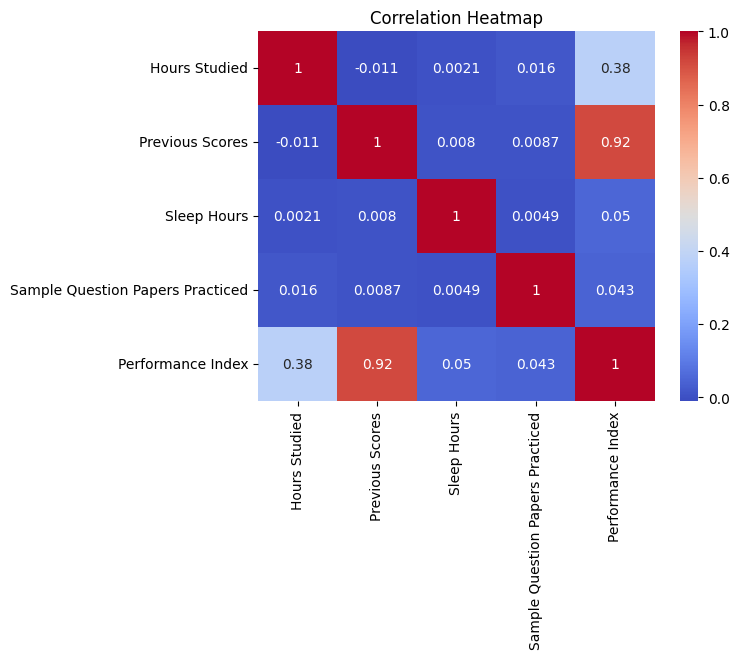

In [56]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Result Hypothesis**

In [57]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(df, continuous_columns , category_columns)

In [58]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

,Previous Scores,Sample Question Papers Practiced,Performance Index
Population Mean,69.441102,4.583004,55.216651
Sample Means,{69.34590932117528},{4.5693135764944275},{55.14955673758865}
H0_accepted,1009,1011,1038
H0_rejected,965,963,936
Conclusion,"H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si..."


In [59]:
comperativeColumn_result

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,NaN,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship
Previous Scores,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship
Extracurricular Activities,There is a relationship,There is a relationship,NaN,There is no relationship,There is a relationship,There is no relationship
Sleep Hours,There is no relationship,There is a relationship,There is no relationship,NaN,There is a relationship,There is no relationship
Sample Question Papers Practiced,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship
Performance Index,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship


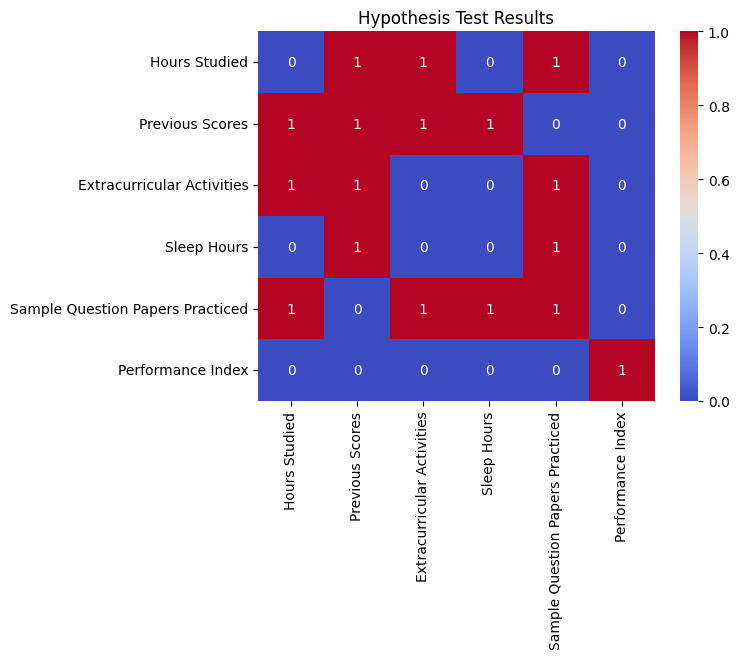

In [60]:
# Create a heatmap
sns.heatmap(comperativeColumn_result == 'There is a relationship', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

# **Data Visualization**

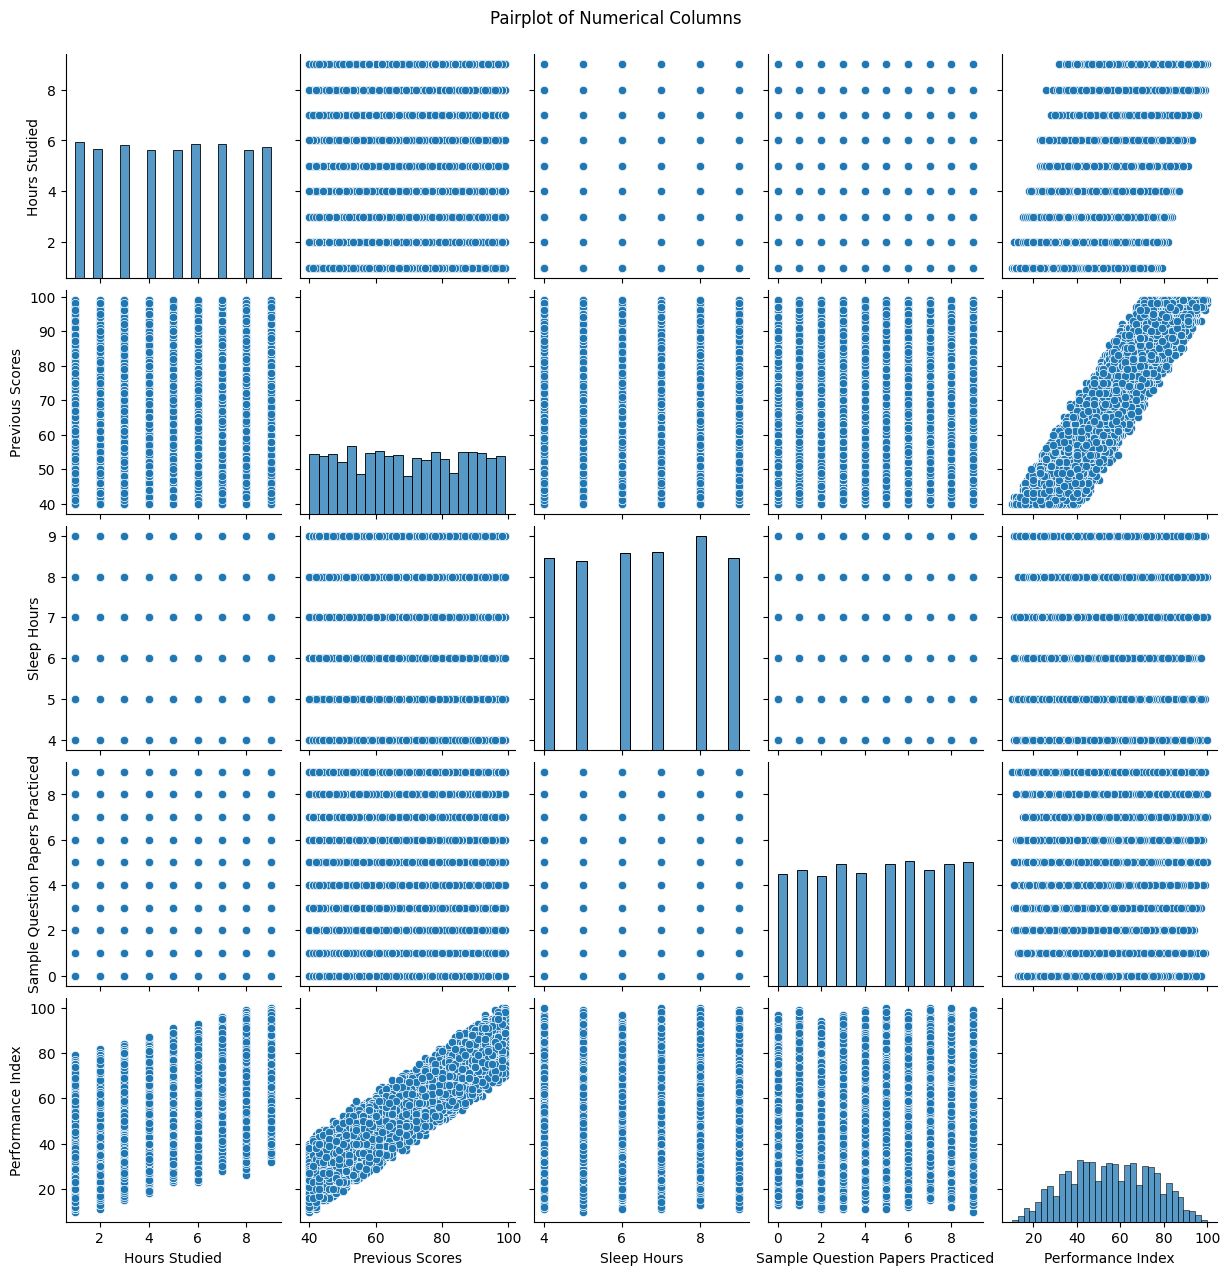

In [61]:
sns.pairplot(df)
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

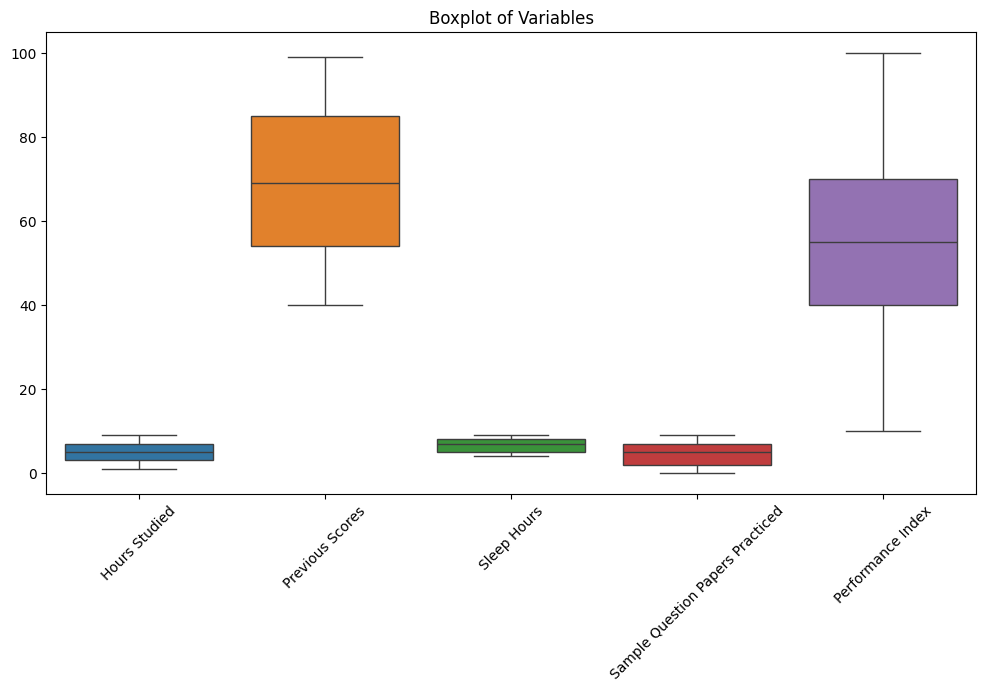

In [62]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Variables')
plt.xticks(rotation=45)
plt.show()

# **Preprocessing**

In [63]:
# Replacing categorical values with numerical equivalents
encode=OrdinalEncoder()
df["Extracurricular Activities"] = encode.fit_transform(df[["Extracurricular Activities"]])

# **Machine Learning**

In [ ]:
# 1 data availability
# 2 separating independent and dependent
# 3 identifying algorithms/Model
# 4 training
# 5 evaluation

**2 separating independent and dependent**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [65]:
x=df.drop('Performance Index',axis=1)
y=df['Performance Index']

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

**3 Identifying algorithms/Model:**

Lazy Predict help build a lot of basic models without much code and helps understand which models works better without any parameter tuning

https://pypi.org/project/lazypredict/

In [75]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)

print(models)

 76%|███████▌  | 32/42 [00:38<00:08,  1.22it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:43<00:00,  1.04s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 92
[LightGBM] [Info] Number of data points in the train set: 7404, number of used features: 5
[LightGBM] [Info] Start training from score 55.234873
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LassoCV                                      0.99       0.99  2.04        0.13
Ridge                                        0.99       0.99  2.04        0.02
RidgeCV                                      0.99       0.99  2.04        0.02
BayesianRidge                                0.99       0.99  2.04        0.02
LassoLarsIC                                  0.99       0.99  2.04        0.02
LarsCV                                      

**4 training**

https://scikit-learn.org/stable/supervised_learning.html

In [ ]:
# Gradient Boosting Regressor
model=GradientBoostingRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
# Ada Boost Regressor
model_1=AdaBoostRegressor().fit(x_train,y_train)
y_pred_1=model_1.predict(x_test)

**5 Evaluation**

Metrics and scoring: quantifying the quality of predictions

https://scikit-learn.org/stable/modules/model_evaluation.html

In [97]:
# Gradient Boosting Regressor
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(4.403812006879466, 0.9879996407646703)

In [98]:
# Ada Boost Regressor
mse = mean_squared_error(y_test, y_pred_1)
r2 = r2_score(y_test, y_pred_1)
mse, r2

(8.735677636595474, 0.9761953349417689)